To predict the median value of Boston house prices using linear regression, follow these steps:
Step-by-Step Solution:

**Load and Prepare Data**

        Read the CSV data into a pandas DataFrame.

        Separate features (X) and target variable (y = MEDV).

**Split Data into Training/Testing Sets**

        Use 80% for training and 20% for testing.

**Train the Linear Regression Model**

        Fit the model on the training data.

**Evaluate Model Performance**

        Calculate Mean Squared Error (MSE) and R-squared (R²) on the test set.

**Interpret Results**

        MSE: Lower values indicate better accuracy (0 is perfect).

        R²: Closer to 1 means the model explains more variance.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


In [4]:
housing_dataset = pd.read_csv('/content/sample_data/boston.csv')
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
housing_dataset.shape

(506, 14)

In [7]:
plt.rcParams['figure.figsize' ] = [8,6]
corr = housing_dataset.corr()
corr


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

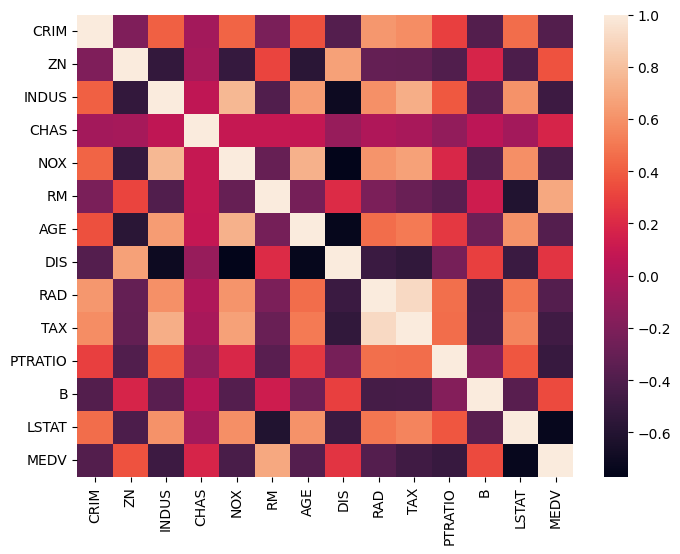

In [8]:
sns.heatmap(corr)

In [12]:
X = housing_dataset.drop('MEDV', axis=1)  # All columns except MEDV
y = housing_dataset['MEDV']  # Target variable

In [13]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predict on test set
y_pred = model.predict(X_test)


In [18]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 24.29
R-squared (R²): 0.67


**Interpretation:**

    MSE of 24.29: On average, the model's predictions are off by about $4,930 (since MSE is in squared units of $1,000s: √24.29 × 1,000 ≈ $4,930).

    R² of 0.67: The model explains 67% of the variance in house prices. This is a reasonable fit but could be improved with feature engineering or more complex models.

**Key Takeaways:**

    The model uses all 13 features (e.g., crime rate, room count, poverty level) to predict house prices.

    Critical Features:

        RM (rooms per dwelling) and LSTAT (lower socioeconomic status) typically have high impact on predictions.

        Check coefficients: model.coef_ shows how each feature affects price (e.g., more rooms → higher price).

    Improvement Ideas:

        Try polynomial features or regularization (Ridge/Lasso).

        Use cross-validation to optimize hyperparameters.